In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_rows=100
pd.options.display.max_columns=250

import matplotlib.pyplot as plt

from pylab import rcParams

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
data = pd.read_csv('movie_metadata.csv')

In [3]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [5]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [6]:
data.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.258486,0.180674,0.271646,0.190016,0.480601,0.624943,0.263203,-0.033897,0.609387,0.119994,0.275707,0.282306,0.305303,-0.049786,0.683176
duration,0.258486,1.000000,0.173296,0.123558,0.088449,0.250298,0.314765,0.123074,0.013469,0.328403,0.074276,-0.135038,0.131673,0.261662,-0.090071,0.196605
director_facebook_likes,0.180674,0.173296,1.000000,0.120199,0.090723,0.144945,0.297057,0.119549,-0.041268,0.221890,0.021090,-0.063820,0.119601,0.170802,0.001642,0.162048
actor_3_facebook_likes,0.271646,0.123558,0.120199,1.000000,0.249927,0.308026,0.287239,0.473920,0.099368,0.230189,0.047451,0.096137,0.559662,0.052633,-0.003366,0.278844
actor_1_facebook_likes,0.190016,0.088449,0.090723,0.249927,1.000000,0.154468,0.192804,0.951661,0.072257,0.145461,0.022639,0.086873,0.390487,0.076099,-0.020049,0.135348
gross,0.480601,0.250298,0.144945,0.308026,0.154468,1.000000,0.637271,0.247400,-0.027755,0.559958,0.102179,0.030886,0.262768,0.198021,0.069346,0.378082
num_voted_users,0.624943,0.314765,0.297057,0.287239,0.192804,0.637271,1.000000,0.265911,-0.026998,0.798406,0.079621,0.007397,0.270790,0.410965,-0.014761,0.537924
cast_total_facebook_likes,0.263203,0.123074,0.119549,0.473920,0.951661,0.247400,0.265911,1.000000,0.091475,0.206923,0.036557,0.109971,0.628404,0.085787,-0.017885,0.209786
facenumber_in_poster,-0.033897,0.013469,-0.041268,0.099368,0.072257,-0.027755,-0.026998,0.091475,1.000000,-0.069018,-0.019559,0.061504,0.071228,-0.062958,0.013713,0.008918
num_user_for_reviews,0.609387,0.328403,0.221890,0.230189,0.145461,0.559958,0.798406,0.206923,-0.069018,1.000000,0.084292,-0.003147,0.219496,0.292475,-0.024719,0.400594


In [7]:
imdb = pd.DataFrame(data, columns=['movie_title', 'gross', 'budget', 'genres', 'country', 'imdb_score'])

In [8]:
imdb.head()

,movie_title,gross,budget,genres,country,imdb_score
0,Avatar,760505847.0,237000000.0,Action|Adventure|Fantasy|Sci-Fi,USA,7.9
1,Pirates of the Caribbean: At World's End,309404152.0,300000000.0,Action|Adventure|Fantasy,USA,7.1
2,Spectre,200074175.0,245000000.0,Action|Adventure|Thriller,UK,6.8
3,The Dark Knight Rises,448130642.0,250000000.0,Action|Thriller,USA,8.5
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,Documentary,NaN,7.1


In [9]:
imdb.describe()

,gross,budget,imdb_score
count,4.159000e+03,4.551000e+03,5043.000000
mean,4.846841e+07,3.975262e+07,6.442138
std,6.845299e+07,2.061149e+08,1.125116
min,1.620000e+02,2.180000e+02,1.600000
25%,5.340988e+06,6.000000e+06,5.800000
50%,2.551750e+07,2.000000e+07,6.600000
75%,6.230944e+07,4.500000e+07,7.200000
max,7.605058e+08,1.221550e+10,9.500000


In [10]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 6 columns):
movie_title    5043 non-null object
gross          4159 non-null float64
budget         4551 non-null float64
genres         5043 non-null object
country        5038 non-null object
imdb_score     5043 non-null float64
dtypes: float64(3), object(3)
memory usage: 236.5+ KB


### Заполним пропущенные данные средними значениями

In [11]:
def fill_col(col):
    """
    Fills in empty spaces by the mean value
    """
    col.fillna(col.mean(), inplace=True)

In [12]:
gross = imdb.loc[:, 'gross']
fill_col(gross)

In [13]:
budget = imdb.loc[:, 'budget']
fill_col(budget)

In [14]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 6 columns):
movie_title    5043 non-null object
gross          5043 non-null float64
budget         5043 non-null float64
genres         5043 non-null object
country        5038 non-null object
imdb_score     5043 non-null float64
dtypes: float64(3), object(3)
memory usage: 236.5+ KB


### Посмотрим на матрицу корреляции

In [15]:
imdb.corr()

,gross,budget,imdb_score
gross,1.000000,0.101437,0.168169
budget,0.101437,1.000000,0.028905
imdb_score,0.168169,0.028905,1.000000


Корреляции между признаками нет

### Построим гисторгамму рейтинга

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 9, 9

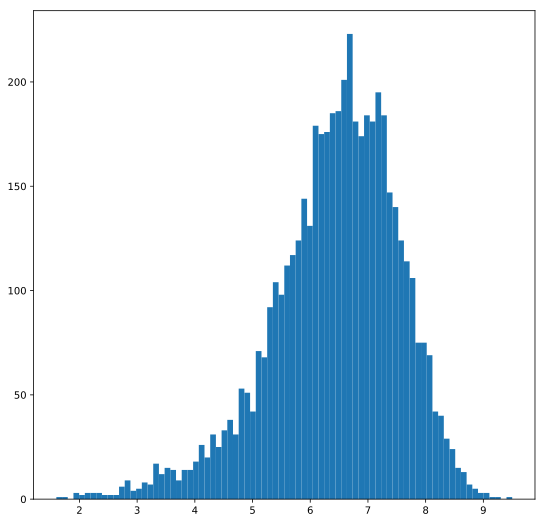

In [17]:
score = imdb.loc[:, 'imdb_score']
plt.hist(score, bins=80)
plt.show()

Рейтинг фильмов имеет распределение, похожее на нормальное

### Рассмотрим разрезы по странам

In [18]:
countries = imdb.groupby('country')['imdb_score'].mean()

In [19]:
rcParams['figure.figsize'] = 9, 12

In [20]:
title_dict = {'fontsize': 20, 'fontweight': 'bold', 'family': 'Calibri'}
label_dict = {'fontsize': '14', 'family': 'Calibri'}

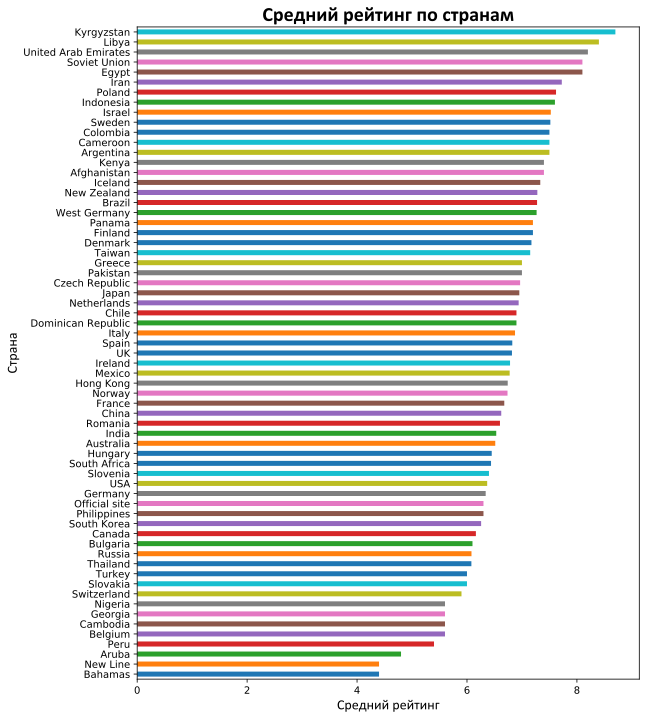

In [21]:
countries.sort_values().plot(kind='barh')

plt.title('Средний рейтинг по странам', fontdict=title_dict)
plt.xlabel('Средний рейтинг', fontdict=label_dict)
plt.ylabel('Страна', fontdict=label_dict)

plt.show()

In [22]:
country_total = imdb['country'].value_counts()
country_total

USA                     3807
UK                       448
France                   154
Canada                   126
Germany                   97
Australia                 55
India                     34
Spain                     33
China                     30
Japan                     23
Italy                     23
Hong Kong                 17
Mexico                    17
New Zealand               15
South Korea               14
Ireland                   12
Denmark                   11
Russia                    11
South Africa               8
Brazil                     8
Norway                     8
Sweden                     6
Poland                     5
Thailand                   5
Netherlands                5
Belgium                    4
Romania                    4
Iran                       4
Argentina                  4
Israel                     4
Switzerland                3
Iceland                    3
Czech Republic             3
West Germany               3
Taiwan        

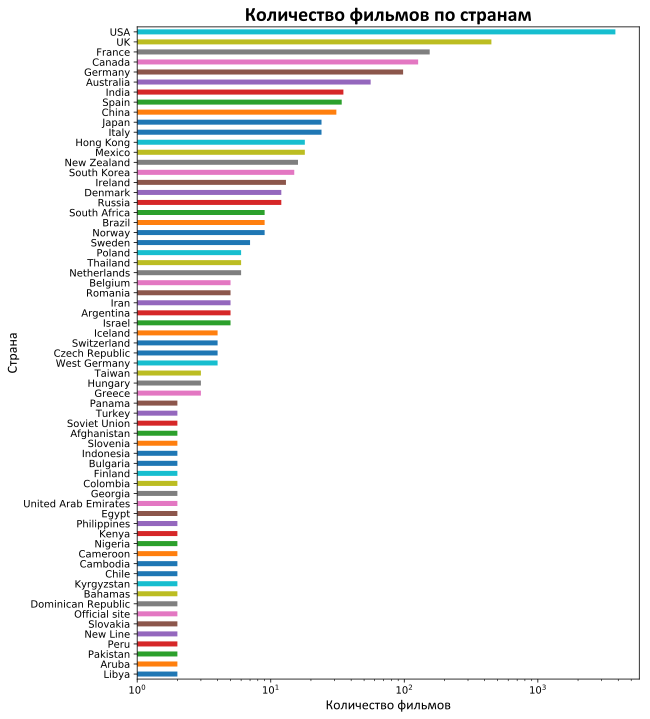

In [23]:
country_total.sort_values().plot(kind='barh', log=True)

plt.title('Количество фильмов по странам', fontdict=title_dict)
plt.xlabel('Количество фильмов', fontdict=label_dict)
plt.ylabel('Страна', fontdict=label_dict)

plt.show()

### Рассмотрим страны с наибольшим количеством фильмов 

In [24]:
country_total.nlargest(5)

USA        3807
UK          448
France      154
Canada      126
Germany      97
Name: country, dtype: int64

In [25]:
rcParams['figure.figsize'] = 7, 4

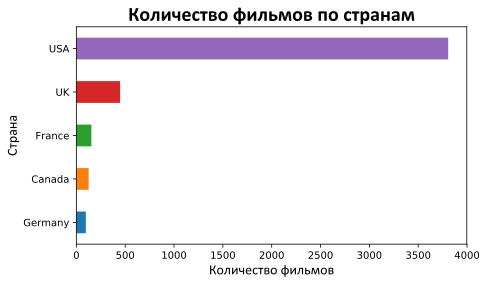

In [26]:
country_total.nlargest(5).sort_values().plot(kind='barh')

plt.title('Количество фильмов по странам', fontdict=title_dict)
plt.xlabel('Количество фильмов', fontdict=label_dict)
plt.ylabel('Страна', fontdict=label_dict)

plt.show()

In [27]:
ds = imdb.loc[imdb['country'].isin(['USA', 'UK', 'France', 'Canada', 'Germany']), :]
ds.head()

,movie_title,gross,budget,genres,country,imdb_score
0,Avatar,760505847.0,237000000.0,Action|Adventure|Fantasy|Sci-Fi,USA,7.9
1,Pirates of the Caribbean: At World's End,309404152.0,300000000.0,Action|Adventure|Fantasy,USA,7.1
2,Spectre,200074175.0,245000000.0,Action|Adventure|Thriller,UK,6.8
3,The Dark Knight Rises,448130642.0,250000000.0,Action|Thriller,USA,8.5
5,John Carter,73058679.0,263700000.0,Action|Adventure|Sci-Fi,USA,6.6


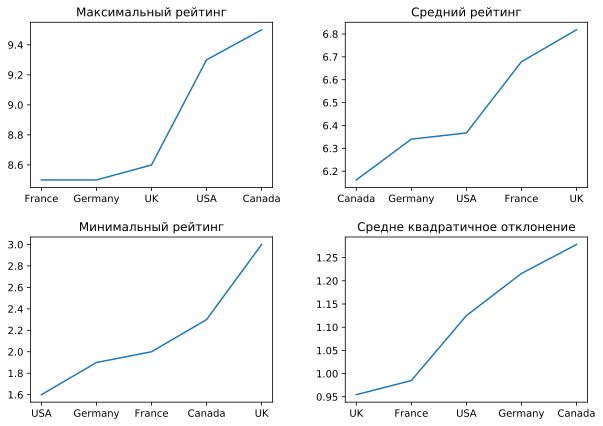

In [28]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

ax1.plot(ds.groupby('country')['imdb_score'].max().sort_values())
ax1.set_title('Максимальный рейтинг')

ax2.plot(ds.groupby('country')['imdb_score'].mean().sort_values())
ax2.set_title('Средний рейтинг')

ax3.plot(ds.groupby('country')['imdb_score'].min().sort_values())
ax3.set_title('Минимальный рейтинг')

ax4.plot(ds.groupby('country')['imdb_score'].std().sort_values())
ax4.set_title('Средне квадратичное отклонение')

fig.set_size_inches(10, 7)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

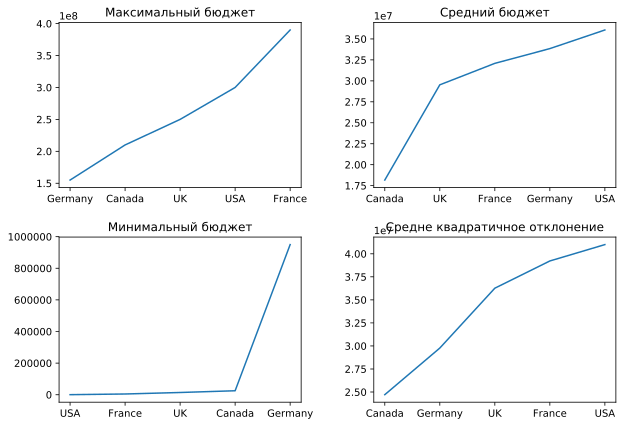

In [29]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

ax1.plot(ds.groupby('country')['budget'].max().sort_values())
ax1.set_title('Максимальный бюджет')

ax2.plot(ds.groupby('country')['budget'].mean().sort_values())
ax2.set_title('Средний бюджет')

ax3.plot(ds.groupby('country')['budget'].min().sort_values())
ax3.set_title('Минимальный бюджет')

ax4.plot(ds.groupby('country')['budget'].std().sort_values())
ax4.set_title('Средне квадратичное отклонение')

fig.set_size_inches(10, 7)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

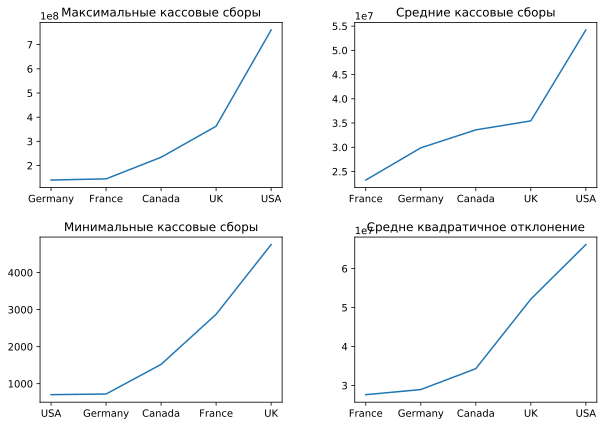

In [30]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

ax1.plot(ds.groupby('country')['gross'].max().sort_values())
ax1.set_title('Максимальные кассовые сборы')

ax2.plot(ds.groupby('country')['gross'].mean().sort_values())
ax2.set_title('Средние кассовые сборы')

ax3.plot(ds.groupby('country')['gross'].min().sort_values())
ax3.set_title('Минимальные кассовые сборы')

ax4.plot(ds.groupby('country')['gross'].std().sort_values())
ax4.set_title('Средне квадратичное отклонение')

fig.set_size_inches(10, 7)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

In [31]:
ds.corr()

,gross,budget,imdb_score
gross,1.000000,0.613149,0.189636
budget,0.613149,1.000000,0.060138
imdb_score,0.189636,0.060138,1.000000


Кассовые сборы и бюджет коррелируют в этой выборке

In [32]:
ds['genres'].value_counts().head(20)

Comedy                          204
Drama                           203
Comedy|Drama|Romance            179
Comedy|Drama                    176
Comedy|Romance                  151
Drama|Romance                   137
Crime|Drama|Thriller             95
Horror                           63
Action|Crime|Drama|Thriller      61
Action|Crime|Thriller            61
Drama|Thriller                   56
Crime|Drama                      55
Horror|Thriller                  54
Crime|Drama|Mystery|Thriller     51
Action|Adventure|Sci-Fi          50
Comedy|Crime                     50
Documentary                      46
Action|Adventure|Thriller        45
Horror|Mystery|Thriller          35
Biography|Drama                  35
Name: genres, dtype: int64